# Insurance claim prediction.
**AIM**: To predict if the user will get the insurance claim or not

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

# class to load data
from load_data import DataCreate

# class to plot the data
from dataplot import DataPlot

# class to create pipelines, data and ml pipeline
from pipelines import pipe_line

# class to create ID features
from idfeats import IDFeatures

# class containing utility function
from utilitfn import UtilityFn

# tune model gb and rf
from tunemodel import ParamTune

# class to create new features
from featEng_1 import FeatureEngineering

## Data
1. Loading training and testing data
1. Data object has methods and properties containing the training and testing data

####  Features and Labels
1. The quantity we want to predict is the OUTCOME.
1. Rest of the columns are features.

In [2]:
## Create the data object
Data = DataCreate()

## label of the data
label = 'OUTCOME'

## call the load data function
Data.load_data()


Data.labelandFeatures(label)
display(Data.train.head())



,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


### Exploratory analysis
We perform following steps in our exploratory analysis.

1. Setting correct datatype for each features.
1. Finding invalid values.
1. Coming up with a strategy to impute incorrect values.



### Checking Datatype of features 
1. **info** utility from pandas gives an information about the datatype of the features


In [3]:
Data.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

## OBJECT datatype
1. We start by investigating features of the **Object**  data type for both the training and test data
1. The number of categories in these features are less so one can use one-hot encoding during preprocessing.

#### AGE 
1. The column actually represents the age group.
1. There are only four categories.
1. One needs to perform some sort of encoding to deal with this feature.
    1. We can use one-hot encoding to do so.

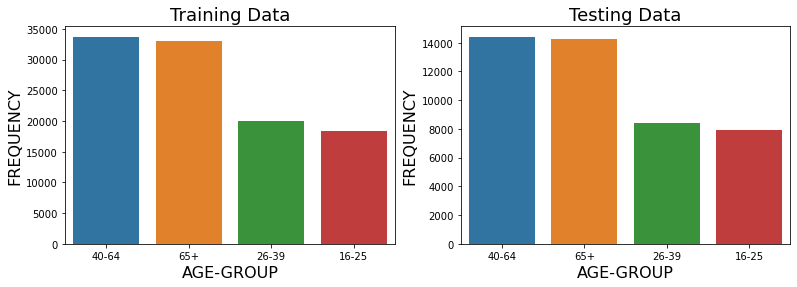

In [4]:
DataPlot.freqPlot(Data,'AGE','AGE-GROUP')

#### GENDER 
1. Gender is a categorical features and needs one-hot encoding as well.

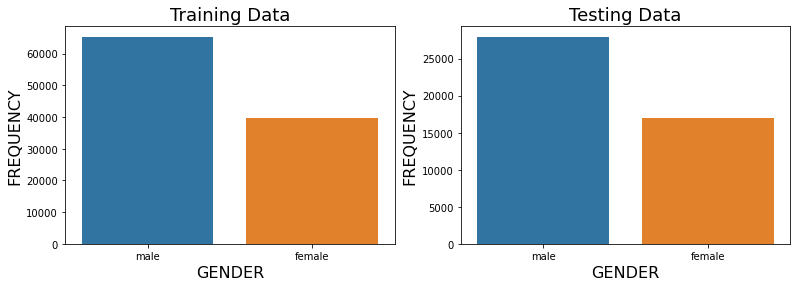

In [4]:
DataPlot.freqPlot(Data,'GENDER','GENDER')

#### DRIVING_EXPERIENCE

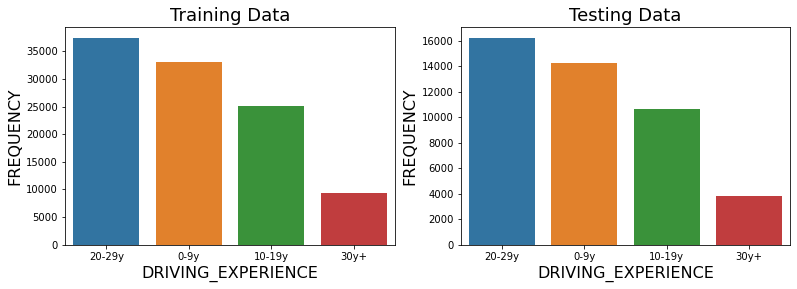

In [5]:
DataPlot.freqPlot(Data,'DRIVING_EXPERIENCE','DRIVING_EXPERIENCE')

#### EDUCATION


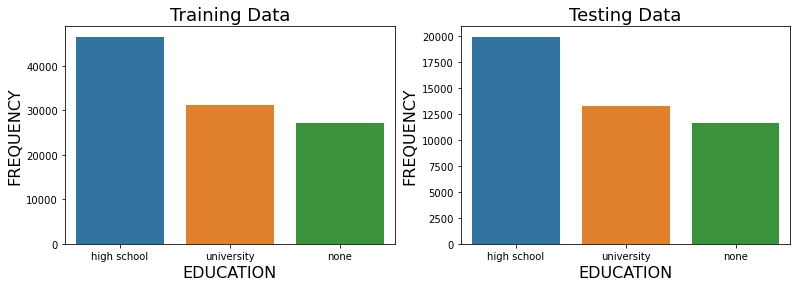

In [6]:
DataPlot.freqPlot(Data,'EDUCATION','EDUCATION')

#### INCOME

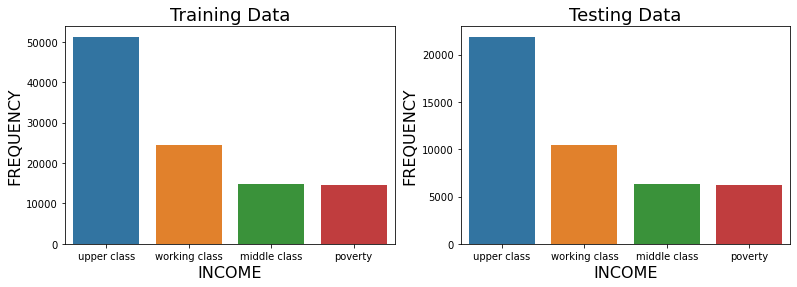

In [8]:
DataPlot.freqPlot(Data,'INCOME','INCOME')

#### VEHICLE_YEAR

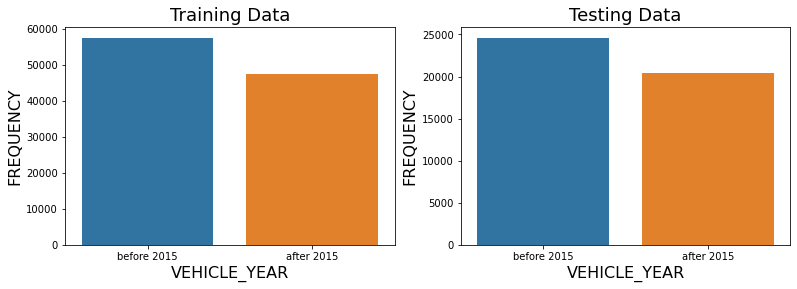

In [7]:
DataPlot.freqPlot(Data,'VEHICLE_YEAR','VEHICLE_YEAR')

#### TYPE_OF_VEHICLE

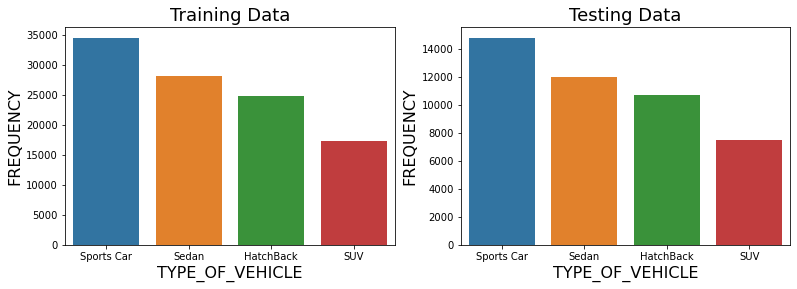

In [10]:
DataPlot.freqPlot(Data,'TYPE_OF_VEHICLE','TYPE_OF_VEHICLE')

## FLOAT64
Plotting the histogram of the numerical features. 

#### CREDIT_SCORE


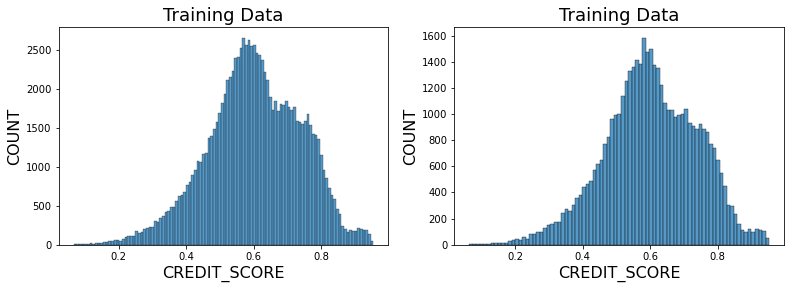

In [8]:
DataPlot.histPlot(Data, 'CREDIT_SCORE', 'CREDIT_SCORE')

#### VEHICLE_OWNERSHIP
* This features has only two value 0/1 and better to convert it into a categorical features

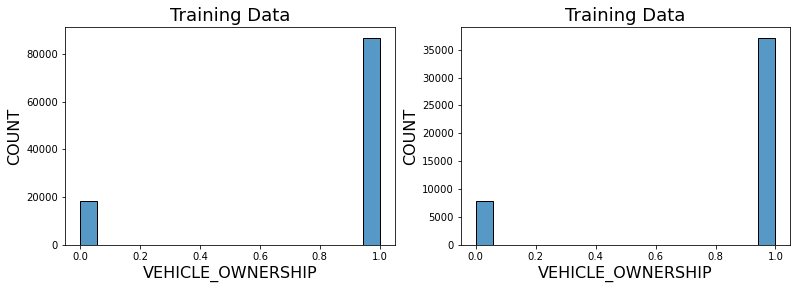

In [12]:
DataPlot.histPlot(Data,'VEHICLE_OWNERSHIP','VEHICLE_OWNERSHIP')

#### MARRIED 
* Only two features indicate either the person is married or not.
* We can convert this feature also into a categorical feature

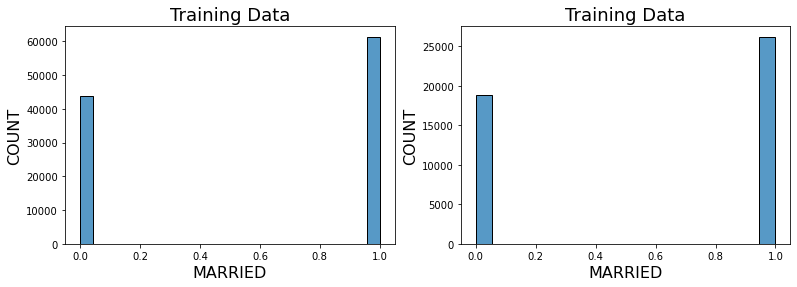

In [13]:
DataPlot.histPlot(Data,'MARRIED','MARRIED')

#### CHILDERN
* Only two possible value either the person has a children or not 
* We can also convert this column into categorical column and use one hot encoding

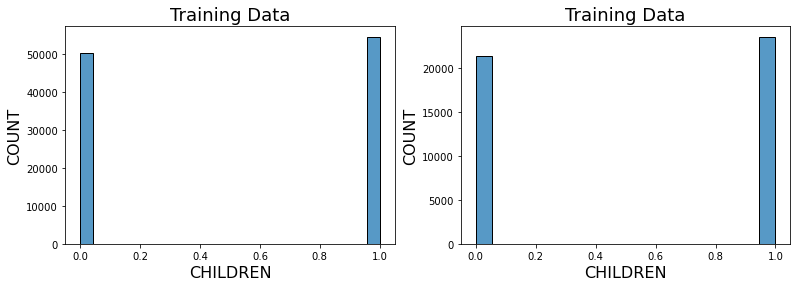

In [14]:
DataPlot.histPlot(Data,'CHILDREN','CHILDREN')

#### ANNUAL_MILEAGE
* Annual mileage column has large range of values so it's not visible.
* It can be due to units being in km.
* One can express mileage in terms of 1000 kms.
* Only discrete values of **ANNUAL_MILEAGE** is available 
* This column can also be converted into a categorical column but using label encoding

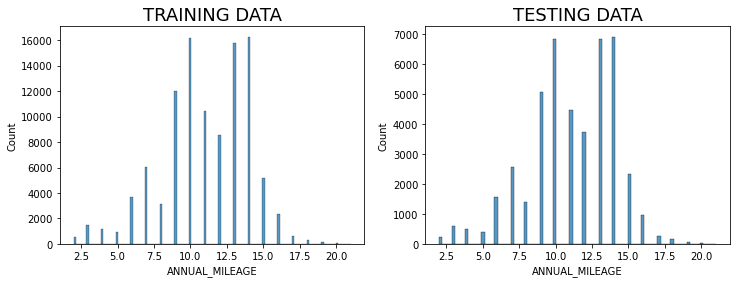

In [15]:
mileage_train = Data.train.ANNUAL_MILEAGE.apply(lambda x: x/1000)
mileage_test = Data.test.ANNUAL_MILEAGE.apply(lambda x: x/1000)
f,ax=plt.subplots(1,2,figsize=(12,4))
g=sns.histplot(mileage_train,ax=ax[0])
g.set_title('TRAINING DATA',fontsize=18)
g1=sns.histplot(mileage_test,ax=ax[1])
g1.set_title('TESTING DATA', fontsize=18)
plt.show()

## INT64


####  POSTAL_CODE AND ID
* They are categorical variable.
* Due to large number of unique values need to be treated carefully.

##### POSTAL CODE
* One needs to also use the POSTAL_CODE feature.
* However, using it might be tricky due to large number of categories.
* Looking at only top 20 categories.
* Few categories have really large value so it might be good idea to use log on the y scale of the bar plot.
* We can see that only few categories have large values and rest of them are simiar so we can use only top n values for encoding purposes.


Number of unique postal codes: 10937


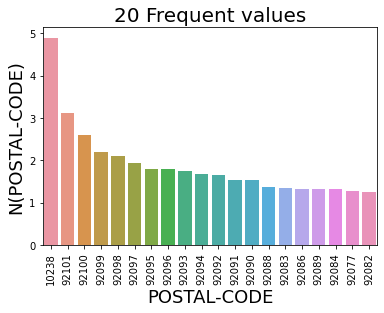

In [4]:
nvals = Data.train.POSTAL_CODE.nunique()
print(f'Number of unique postal codes: {nvals}')
DataPlot.plotIDs(Data,20,'POSTAL_CODE','POSTAL-CODE','N(POSTAL-CODE)')

### ID
* User ID is similar to the POSTAL_CODE
* I use only top 20 rest of the ID's are put in the same category.

Number of unique postal codes:  98485


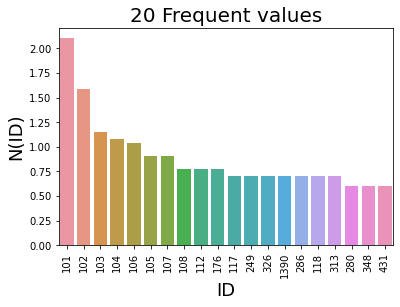

In [5]:
nvals = Data.train.ID.nunique()
print(f'Number of unique postal codes:  {nvals}')
DataPlot.plotIDs(Data, 20, 'ID', 'ID', 'N(ID)')


#### SPEEDING_VIOLATIONS
* The number of speeding violations are integer. 
* They can be set to ordinal varible

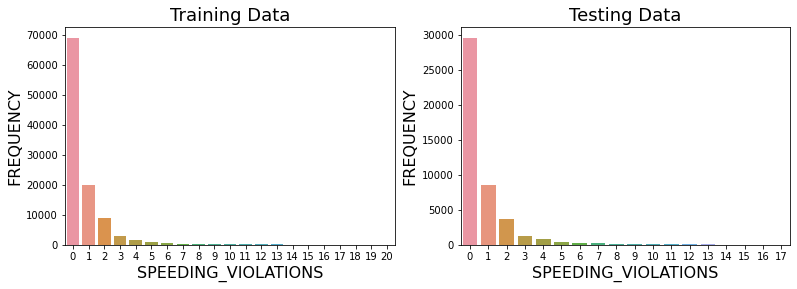

In [6]:
DataPlot.freqPlot(Data,'SPEEDING_VIOLATIONS','SPEEDING_VIOLATIONS')

#### DUIS

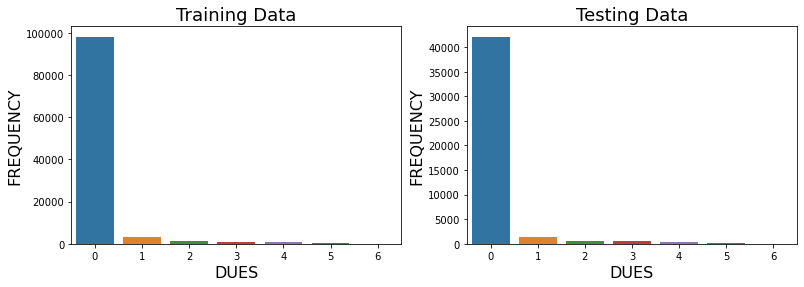

In [20]:
DataPlot.freqPlot(Data,'DUIS','DUES')

#### PAST_ACCIDENTS

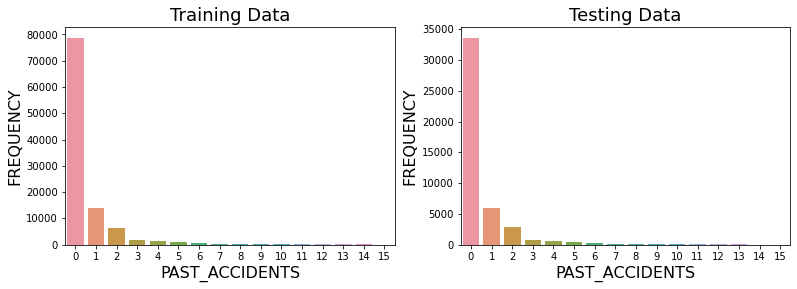

In [21]:
DataPlot.freqPlot(Data,'PAST_ACCIDENTS','PAST_ACCIDENTS')

#### Feature datatype conversion
* **Categorical variables**: Are discrete, no order/preference in the value.
    1. ID
    1. GENDER
    1. VEHICLE_OWNERSHIP
    1. MARRIED
    1. CHILDREN
    1. POSTAL_CODE
    1. TYPE_OF_VEHICLE
    1. AGE
    1. DRIVING EXPERIENCE
    1. EDUCATION
    1. INCOME
    1. VEHICLE_YEAR
    1. ANNUAL_MILEAGE
    1. SPEEDING_VIOLATIONS
    1. DUIS
    1. PAST_ACCIDENTS
* **Numeric features**: 
    1. CREDIT_SCORE

### Creating POSTAL_ID features

In [7]:
Data.train,Data.test=IDFeatures.postal_code_features(Data.train,Data.test,20)

# BASE MODEL
* Importing important libraries and modules.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import optuna
from itertools import product
from sklearn import set_config
set_config(display='diagram')

### ParamTune Class
Class to encode method  to tune model hyper parameters


### Data preparation
* Function that combines all the data loading, manipulation steps in itself.

In [14]:
def dataPrep_ensemble(features_ignore=['ID','POSTAL_CODE']):
    '''
    This function will give us the data that is preprocessed for the use. 
    ### Parameters: 
        None
    ### Return: 
        df1(dataframe) : training data
        df2(dataframe): testing data
    '''

    obj = DataCreate()
    obj.load_data()  # load the data

    label = 'OUTCOME'
    
    ## convert ID features into a categorical feature
    #IDFeatures.ID_features(obj.train,obj.test,20)

    ## convert POSTAL_CODE features into a categorical feature
    obj.train,obj.test=IDFeatures.postal_code_features(obj.train, obj.test,20)


    obj.labelandFeatures(label)
    obj.convertDatatype()

    cat_col  = ['NEW_POSTAL_CODE','GENDER', 'VEHICLE_OWNERSHIP', 'MARRIED',
                'CHILDREN', 'TYPE_OF_VEHICLE', 'AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR',
                'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
    
    num_col = ['CREDIT_SCORE']

    obj.cat_col = cat_col
    obj.num_col = num_col

    pipe_line.data_pipeline_tree(obj)

    ## ignoring these features for the time being
    features_ignore = ['ID', 'POSTAL_CODE']
    obj.features_1 = obj.features.drop(features_ignore)
    
    ## create train/test split data
    UtilityFn.split_data(obj)
    
    return obj


def dataPrep_linear(features_ignore=['ID', 'POSTAL_CODE']):
    '''
    This function will give us the data that is preprocessed for the use. 
    ### Parameters: 
        None
    ### Return: 
        df1(dataframe) : training data
        df2(dataframe): testing data
    '''

    obj = DataCreate()
    obj.load_data()  # load the data

    label = 'OUTCOME'

    ## convert ID features into a categorical feature
    #IDFeatures.ID_features(obj.train,obj.test,20)

    ## convert POSTAL_CODE features into a categorical feature
    obj.train, obj.test = IDFeatures.postal_code_features(
        obj.train, obj.test, 20)

    obj.labelandFeatures(label)
    obj.convertDatatype()

    cat_col = ['NEW_POSTAL_CODE', 'GENDER', 'VEHICLE_OWNERSHIP', 'MARRIED',
               'CHILDREN', 'TYPE_OF_VEHICLE', 'AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR',
               'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

    num_col = ['CREDIT_SCORE']

    obj.cat_col = cat_col
    obj.num_col = num_col

    pipe_line.data_pipeline_linear(obj)

    ## ignoring these features for the time being
    features_ignore = ['ID', 'POSTAL_CODE']
    obj.features_1 = obj.features.drop(features_ignore)

    ## create train/test split data
    UtilityFn.split_data(obj)

    return obj




## Data Preparation
* Calling function dataPrep_ensemble.
    1. It will load the training and test data.
    1. It will create ID and POSTAL ID features.
    1. Set the features and labels from the dataset.


In [15]:
data1 = dataPrep_ensemble()
data1.data_pipe



ColumnTransformer(transformers=[('ord_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('transform',
                                                  OrdinalEncoder())]),
                                 ['NEW_POSTAL_CODE', 'GENDER',
                                  'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
                                  'TYPE_OF_VEHICLE', 'AGE',
                                  'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                                  'VEHICLE_YEAR', 'ANNUAL_MILEAGE',
                                  'SPEEDING_VIOLATIONS', 'DUIS',
                                  'PAST_ACCIDENTS']),
                                ('num_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('transform',
                                                  StandardScaler())]),
                                 ['CREDIT_SCORE'])])

In [6]:
data2  = dataPrep_linear()
data2.data_pipe

ColumnTransformer(transformers=[('oh_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('transform',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['NEW_POSTAL_CODE', 'GENDER',
                                  'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
                                  'TYPE_OF_VEHICLE', 'AGE',
                                  'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                                  'VEHICLE_YEAR', 'ANNUAL_MILEAGE',
                                  'SPEEDING_VIOLATIONS', 'DUIS',
                                  'PAST_ACCIDENTS']),
                                ('num_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('transform',
                                                  StandardScaler())]),
                                 ['CREDIT_SCORE'])])

## Model Fitting and Hyper parameter optmization
* First a hyper-parameter tuning is performed on the data.
* Optimized model is used to create a model that is trained on the full data set. 
* The new model is used to make predictions on the test data.

In [112]:
def randomForest(param, obj: object, filename: str):
    '''
    This function will fit a  random forest with optimized hyperparameters
    ### Parameters:
        param(dict): dictionary containing the data
        obj(object): instance of the data class
        filename(str): file name that wants to store the data
    ### Return:
        None
    '''

    clf_rf = RandomForestClassifier(max_depth=param['max_depth'], n_estimators=param['n_estimators'],
                                    min_samples_split=param['min_samples_split'],
                                    min_samples_leaf=param['min_samples_leaf'], random_state=42)
    UtilityFn.create_full_pipe(obj, clf_rf, filename)



def boostingGrad(param: dict, obj: object, filename: str):
    '''
    This function will fit a  random forest with optimized hyperparameters
    ### Parameters:
        param(dict): dictionary containing the data
        obj(object): instance of the data class
        filename(str): file name that wants to store the data
    ### Return:
        None
    '''
    clf_gb = GradientBoostingClassifier(
        max_depth=param['max_depth'], n_estimators=param['n_estimators'],
        # min_samples_leaf=param_dict_gb['min_samples_leaf'],
        learning_rate=param['learning_rate'],
        min_samples_split=param['min_samples_split'],
        random_state=42)

    UtilityFn.create_full_pipe(obj, clf_gb, filename)
    

### function to plot feature importance 
def feature_importance(obj: object, x: str, y: str, clfname: str):
    '''
    This function will plot the feature importance given the object
    ### Parameter:
        obj(object): instance of the data class
        x(str): x-axis 
        y(str): y-axis 
        clfname(str): name of the classifier
    ### Return:  
        None
    '''

    clf = obj.ml_pipe[1]
    feat_imp = pd.DataFrame(
        {'feature': obj.features_1, 'importance': clf.feature_importances_})
    feat_imp = feat_imp.sort_values(by='importance')
    g = feat_imp.plot(kind='barh', x=x, y=y, figsize=(7, 5))
    g.set_title(f'Feature importance for a {clfname}', fontsize=20)
    g.set_xlabel('Feature Importance', fontsize=18)
    g.set_ylabel('Feature name', fontsize=18)
    plt.show()


## Gradient Boosting

* Implementing a gradient boosting classifier and performing hyperparameter tuning using optuna.
 

In [114]:
param_dict = ParamTune.tune_params_gb(data1, 1)
boostingGrad(param_dict,data1,'trial_gb')


[I 2022-11-04 17:16:18,431] A new study created in memory with name: no-name-f31686de-a100-4279-b4c6-c53ae6ef4844
[I 2022-11-04 17:16:59,970] Trial 0 finished with value: 0.6813845642939805 and parameters: {'max_depth': 24, 'n_estimators': 91, 'learning_rate': 0.02874667833898013, 'min_samples_split': 0.13074475925514228}. Best is trial 0 with value: 0.6813845642939805.


Log-loss for the training data: 0.677253271030428
Log-loss for the validation data: 0.6774216424103153
----- Predictions Saved -------


#### Feature importance
Feature importance for the classifier

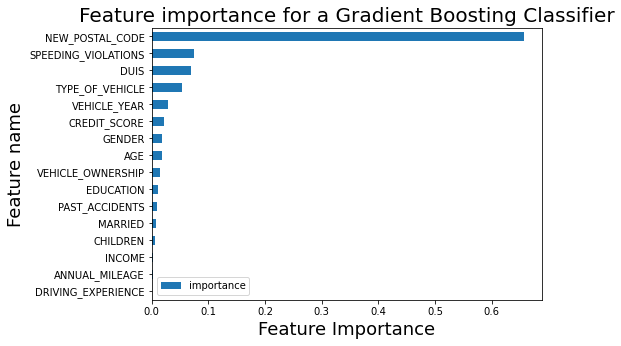

In [115]:
clfname = 'Gradient Boosting Classifier'
feature_importance(data1, 'feature', 'importance', clfname)


## Random Forest Classifier

In [111]:
param_dict_feats_rf = ParamTune.tune_params_rf(data1, 1)
randomForest(param_dict_feats_rf, data1, 'trial_rf')

[I 2022-11-04 17:15:11,421] A new study created in memory with name: no-name-174d6d15-5f5d-499b-8184-7b9ec5fc84ef
[I 2022-11-04 17:15:23,260] Trial 0 finished with value: 0.6810881237697681 and parameters: {'max_depth': 2, 'n_estimators': 149, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6810881237697681.


Log-loss for the training data: 0.6809193909352583
Log-loss for the validation data: 0.6809583741584901
----- Predictions Saved -------


#### Feature Importance 
One can plot the feature importance for the random forest classifier

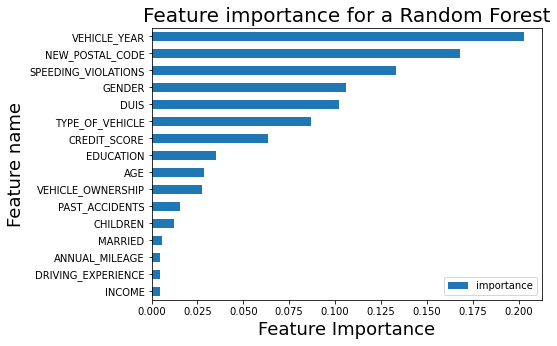

In [113]:
clfname = 'Random Forest'
feature_importance(data1, 'feature', 'importance', clfname)


# Feature Engineering

1. Boolean features capturing if the person had more than n speeding violations or not.
1. Boolean features capturing if the person has more than n DUES.
1. Boolean features captuing if the person has n past accidents or not.


In [28]:
def createNewFeatures():
    '''
    This feature will take the data object and create new features and 
    add them into the data frame
    ### Parameter: 
        None
    ### Return: 
        obj(object): object containing new features 
    '''
    ## Creat the object
    obj = DataCreate()

    obj.load_data()
    label = 'OUTCOME'

    ## convert ID features into a categorical feature
    #IDFeatures.ID_features(obj.train, obj.test, 20)

    ## convert POSTAL_CODE features into a categorical feature
    IDFeatures.postal_code_features(obj.train, obj.test, 20)

    ## combining dues feature to create new features
    FeatureEngineering.convertDUIS(obj)

    ## combining SPEEDING_VIOLATIONs to create new features
    FeatureEngineering.convertSpeed(obj)

    ## combining PAST_ACCIDENTS to create new features
    FeatureEngineering.convertAccident(obj)

    ## combine MARRIED and CHILDREN features
    FeatureEngineering.marriedChild(obj)

    obj.labelandFeatures(label)
    obj.convertDatatype()

    cat_col = ['NEW_POSTAL_CODE', 'GENDER', 'VEHICLE_OWNERSHIP', 'MARRIED',
               'CHILDREN', 'TYPE_OF_VEHICLE', 'AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR',
               'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
               'DUIS_CAT','SPEEDING_VIOLATIONS_CAT','PAST_ACCIDENTS_CAT','MAR_CHILD']
    num_col = ['CREDIT_SCORE']

    obj.cat_col = cat_col
    obj.num_col = num_col
    pipe_line.data_pipeline_tree(obj)

    ## ignoring these features for the time being
    features_ignore = ['ID', 'POSTAL_CODE']
    obj.features_1 = obj.features.drop(features_ignore)

    ## create train/test split data
    UtilityFn.split_data(obj)

    return obj



**Create new features based on existing features**

In [33]:
dataN = createNewFeatures()

#### DUIS

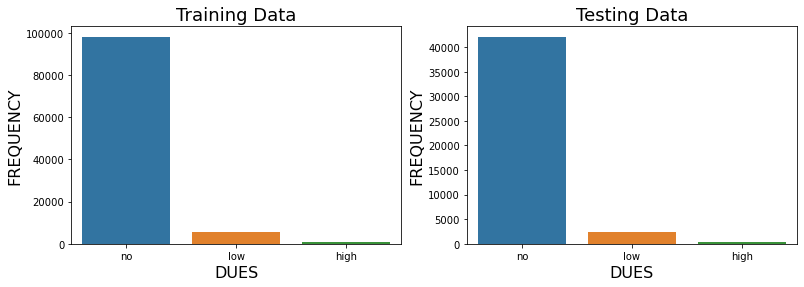

In [34]:
DataPlot.freqPlot(dataN, 'DUIS_CAT', 'DUES')


#### SPEEDING_VIOLATIONS

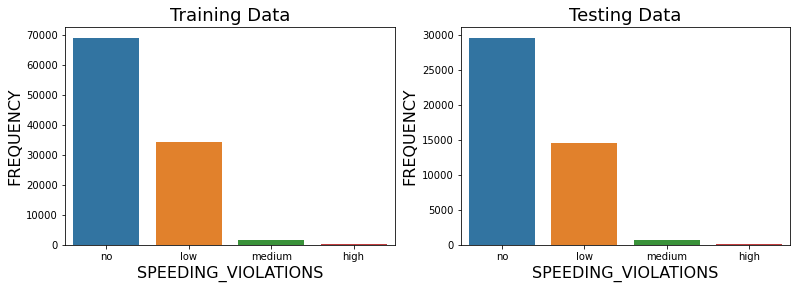

In [35]:
DataPlot.freqPlot(dataN, 'SPEEDING_VIOLATIONS_CAT', 'SPEEDING_VIOLATIONS')


#### PAST_ACCIDENTS

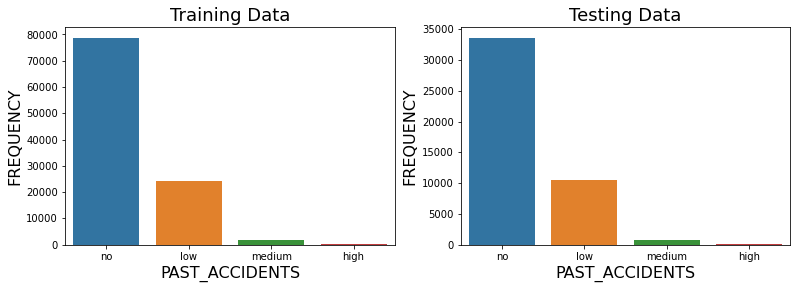

In [36]:
DataPlot.freqPlot(dataN, 'PAST_ACCIDENTS_CAT', 'PAST_ACCIDENTS')


#### Married and Children features

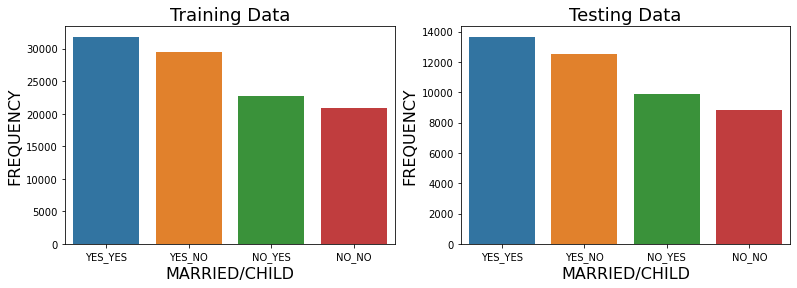

In [37]:
DataPlot.freqPlot(dataN, 'MAR_CHILD', 'MARRIED/CHILD')
